In [1]:
# Hierarchical Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataset = pd.read_csv('listings.csv')

# Replace the empty string with np.nan
dataset.replace(r'', np.nan)

# Ignore listings that contain missing values
nan_removed = dataset[~pd.isnull(dataset).any(axis=1)]

# Extract columns - latitude, longitude, price
data = nan_removed[['latitude','longitude','price']]

# Scale the data
data_scaled = preprocessing.scale(data)

# data_scaled = data_scaled[:8000]

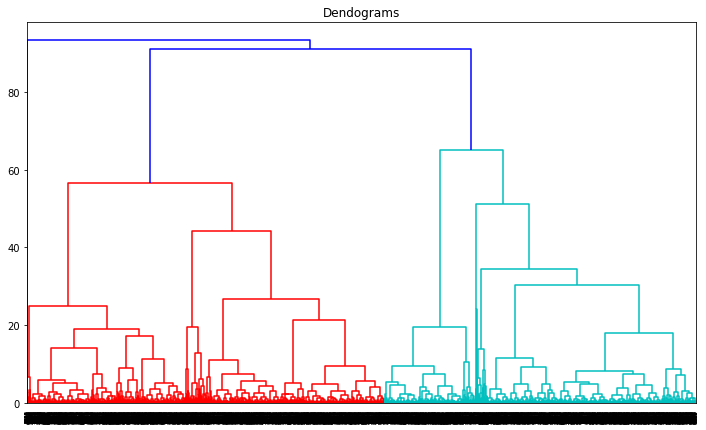

In [3]:
# Create a dendrogram to know the clusters that we want the data to be split to.
plt.figure(figsize=(12, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [4]:
# Run the Agglomerative Clustering Algorithm
# Returns the names of the clusters that each data point belongs to
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 2, 0, ..., 0, 2, 2])

In [5]:
# assign each point to its corresponding cluster
assignments = cluster.labels_
clustering = defaultdict(list)
for assignment, point in zip(assignments, data_scaled):
    clustering[assignment].append(point)

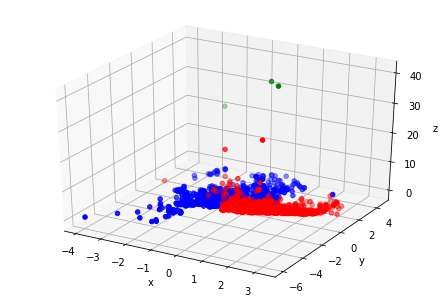

In [6]:
# 3D Visualization of Hierarchical Clustering (an example for k=3)

# extract x_coord, y_coord, z_coord
x_0 = np.array(clustering[0])[:,0]
y_0 = np.array(clustering[0])[:,1]
z_0 = np.array(clustering[0])[:,2]
x_1 = np.array(clustering[1])[:,0]
y_1 = np.array(clustering[1])[:,1]
z_1 = np.array(clustering[1])[:,2]
x_2 = np.array(clustering[2])[:,0]
y_2 = np.array(clustering[2])[:,1]
z_2 = np.array(clustering[2])[:,2]

# plot the clustering in 3D space
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x_0, y_0, z_0, color='red')
ax.scatter(x_1, y_1, z_1, color='green')
ax.scatter(x_2, y_2, z_2, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()